# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ и $V$ — матрицы с ортонормированными столбцами размеров $m\times k$ и $n \times k$ соответственно, $\Sigma$ — диагональная матрица размера $k\times k$, где $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [1]:
!pip install scikit-image
import numpy as np
from skimage.io import imread

img = imread(r'chain_small.JPG')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


Нарисуйте картинку:

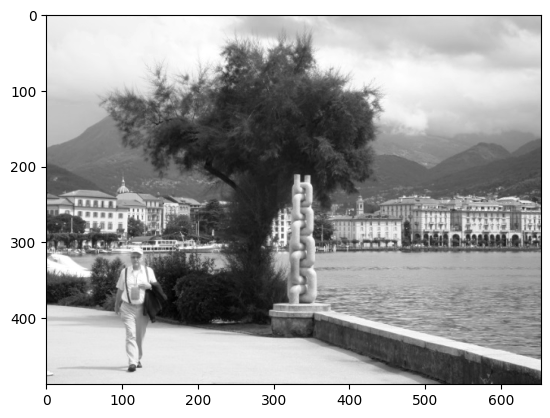

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [26]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)
S.shape

(488,)

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

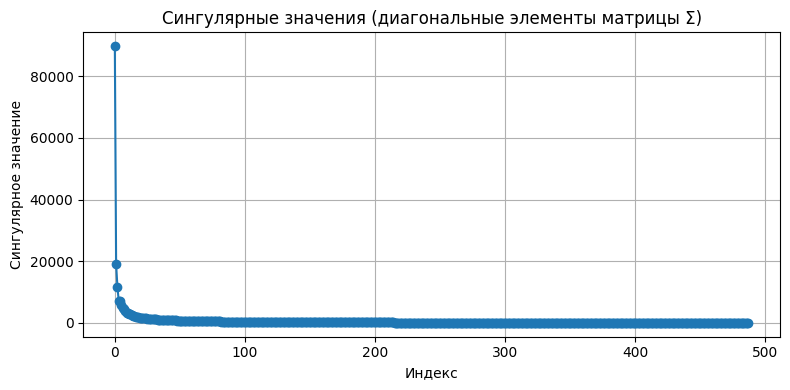

In [27]:
plt.figure(figsize=(8, 4))
plt.plot(S, marker='o')
plt.title('Сингулярные значения (диагональные элементы матрицы Σ)')
plt.xlabel('Индекс')
plt.ylabel('Сингулярное значение')
plt.grid(True)
plt.tight_layout()
plt.show()

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

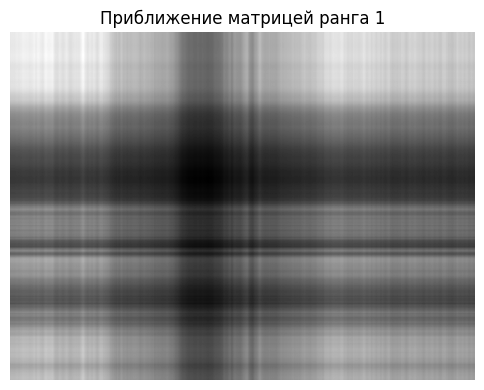

In [28]:
x = 1
r1 = S[0:x] * U[:, 0:x] @ VT[0:x, :]
plt.figure(figsize=(6, 6))
plt.title(f'Приближение матрицей ранга {x}')
plt.imshow(r1, cmap='gray')
plt.axis('off')
plt.show()

Видна только общая структура (прямые линии), потеряна вся детализация, потому что матрица ранга 1 довольно плохо приближает исходную матрицу.

**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

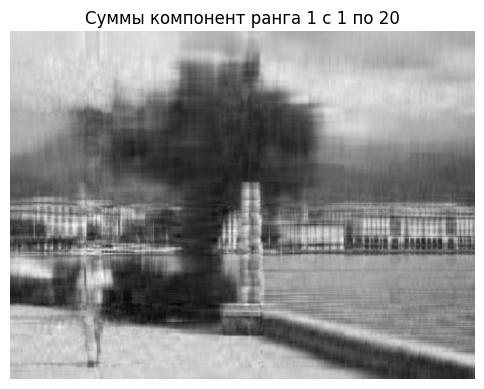

In [29]:
a = 1
b = 20
r = S[a-1:b] * U[:, a-1:b] @ VT[a-1:b, :]
plt.figure(figsize=(6, 6))
plt.title(f'Суммы компонент ранга 1 с {a} по {b}')
plt.imshow(r, cmap='gray')
plt.axis('off')
plt.show()

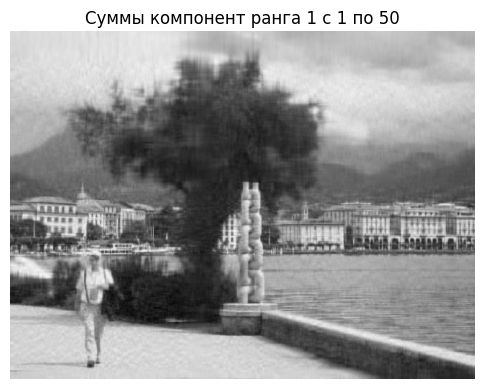

In [30]:
a = 1
b = 50
r = S[a-1:b] * U[:, a-1:b] @ VT[a-1:b, :]
plt.figure(figsize=(6, 6))
plt.title(f'Суммы компонент ранга 1 с {a} по {b}')
plt.imshow(r, cmap='gray')
plt.axis('off')
plt.show()

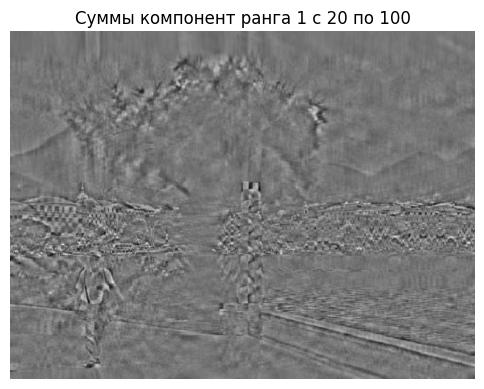

In [31]:
a = 20
b = 100
r = S[a-1:b] * U[:, a-1:b] @ VT[a-1:b, :]
plt.figure(figsize=(6, 6))
plt.title(f'Суммы компонент ранга 1 с {a} по {b}')
plt.imshow(r, cmap='gray')
plt.axis('off')
plt.show()

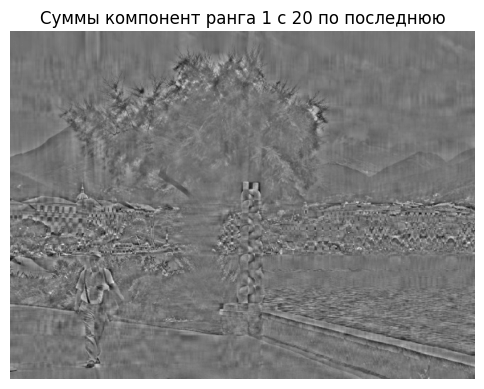

In [32]:
a = 20
r = S[a-1:] * U[:, a-1:] @ VT[a-1:, :]
plt.figure(figsize=(6, 6))
plt.title(f'Суммы компонент ранга 1 с {a} по последнюю')
plt.imshow(r, cmap='gray')
plt.axis('off')
plt.show()

Суммы компонент ранга 1 с первой по 20 и с первой по 50 уже довольно хорошо приближают исходную матрица (картинки очень похожи). При этом суммы компонент ранга 1 с 20 по 100 и с 20 по последнюю добавляют детализацию, но не показывают общую структуру исходной картинки 

**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

Отношение нормы разности исходной матрицы и приближенной к норме исходной матрицы: 0.09%


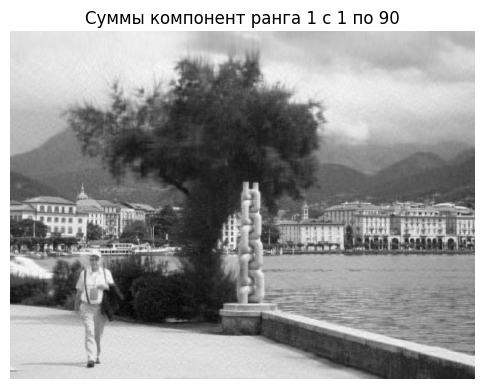

In [33]:
x = 90
print(f'Отношение нормы разности исходной матрицы и приближенной к норме исходной матрицы: {sum(S[x:]**2)/sum(S**2) * 100:.2f}%')
r = S[:x] * U[:, :x] @ VT[:x, :]

plt.figure(figsize=(6, 6))
plt.title(f'Суммы компонент ранга 1 с 1 по {x}')
plt.imshow(r, cmap='gray')
plt.axis('off')
plt.show()

Это означает, что первые 90 компонент очень хорошо приближают исходную матрицу (потеря меньше одной десятой процента)

**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

In [34]:
U.shape, S.shape, VT.shape, img.shape

((488, 488), (488,), (488, 653), (488, 653))

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

Нам понадобится хранить только $90 \times (488 + 653 + 1) = 102780$ чисел вместо матрицы размера $488\times 653 = 318664$, то есть нужно в $\frac{318664}{102780} = 3,1$ раза меньше памяти

**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

In [35]:
img.nbytes/(S[:x].nbytes + U[:,:x].nbytes + VT[:x,:].nbytes)

3.1004475578906403

Результат согласуется с расчетами в предыдущем пункте. Полное хранение всех элементов матрицы требует значительно больше памяти.

### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

**Подсказки:**
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$ выразите вектор $w$ как $\alpha\cdot v$, где $|v|=1$, и рассмотрите описанное выражение
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|w| = 1}~|Xw|$ представьте $w$ в виде линейной комбинации ортонормированного базиса, состоящего из собственных векторов оператора $X^TX$, и внимательно посмотрите на произведение $wX^TXw$
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$ разложите матрицу $X$ в SVD-разложение, а векторы $u$ и $w$ представьте в виде линейной комбинации векторов, являющихся столбцами матриц $U$ и $V$.

1) Пусть $w=\alpha v$, $|v| = 1$, тогда $\max_{|v|=1} \frac{\alpha|Xv|}{\alpha|v|} = max_{|v|=1} |Xv|$ (второе равенство доказано).\

2) Пусть $e_1, e_2, \dots, e_n$ - ортонормированный базис из собственных векторов $X^TX$ и $v = v_1e_1 + \dots + v_ne_n$, тогда $|Xv|^2 = v^TX^TXv = v^T(v_1X^TXe_1 + \dots + v_nX^TXe_n) = v^T (v_1\sigma_1^2e_1 + \dots + v_n\sigma_n^2e_n) = \begin{pmatrix}v_1 \dots v_n
\end{pmatrix} \begin{pmatrix} \sigma_1^2v_1\\ \ldots \\ \sigma_n^2v_n
\end{pmatrix} =$\
$ = \sigma_1^2v_1^2+\dots + \sigma_n^2v_n^2 \leqslant \sigma_1^2 ( v_1^2+\dots + v_n^2) = \sigma_1^2$, причем равенство достигается при $v_1 = 1,\ v_2 = v_3 = \dots = v_n = 0$

4) Пусть $X = U\Sigma V^T$, $u = a_1U^{(1)} + \dots + a_m U^{(m)},\ v = b_1V^{(1)} + \dots + b_n V^{(n)}$, $|u|=|v|=1$, тогда $|u^TXv| = |u^TU\Sigma V^Tv| = |(a_1, \dots, a_m) \Sigma (b_1, \dots, b_n)^T| = a_1b_1\sigma_1 + \dots + a_nb_n\sigma_n$ (без ограничения общности считаем, что $m \geqslant n$)\
При этом $|u| = a_1^2 + \dots + a_m^2 = 1,\ |v| = b_1^2 + \dots + b_n^2 = 1$\
Значит, $|u^TU\Sigma V^Tv| = a_1b_1\sigma_1 + \dots + a_nb_n\sigma_n \leqslant \sigma_1(a_1b_1 + \dots + a_nb_n) \leqslant \sigma_1\sqrt{(a_1^2+\dots+a_n^2)(b_1^2+\dots+b_n)^2} = \sigma_1$, причем равенство достигается при $u = U^{(1)},\ v = V^{(1)}$

**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортонормированными столбцами размера $n\times r$, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$.

$A = \left(\begin{matrix}
\sin(0)\cos(0) & \sin(0)\cos(1) & \dots & \sin(0)\cos(n-1)\\
\sin(1)\cos(0) & \sin(1)\cos(1) & \dots & \sin(1)\cos(n-1)\\
\dots & \dots & \dots & \dots \\
\sin(n-1)\cos(0) & \sin(n-1)\cos(1) & \dots & \sin(n-1)\cos(n-1)\\
\end{matrix}\right) = \left(\begin{matrix}
\sin(0)\\
\sin(1)\\
\dots\\
\sin(n-1)
\end{matrix}\right) \left(\begin{matrix}
\cos(0) & \cos(1) & \dots & \cos(n-1)
\end{matrix}\right) \implies r = \text{rk} A = 1$\
Пусть $s = \sum_{i=0}^{n-1} \sin^2(i),\ c = \sum_{i=0}^{n-1} \cos^2(i)$\
Положим $\sigma_1 = \sqrt{s\cdot c} > 0$. Тогда $A = U\Sigma V^T$, где $\Sigma = \left(\begin{matrix}
\sigma_1
\end{matrix}\right),\ U = \left(\begin{matrix}
\frac{\sin(0)}{s}\\
\frac{\sin(1)}{s}\\
\dots\\
\frac{\sin(n-1)}{c}
\end{matrix}\right),\ V = \left(\begin{matrix}
\frac{\cos(0)}{c}\\
\frac{\cos(1)}{c}\\
\dots\\
\frac{\cos(n-1)}{c}
\end{matrix}\right)$, причем $V^TV = U^TU = E$, то есть $U$ и $V$ ортогональны.\
Таким образом, найдено сингулярное разложение.

**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

1) $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$

$\subseteq$:\
$x\in \mathbb{R}^n \implies Ax = U\Sigma V^Tx$. Пусть $V^Tx = y = \left(\begin{matrix}
y_1\\
\dots\\
y_r\\
y_{r+1}\\
\dots\\
y_n
\end{matrix}\right)$, тогда $Ax = U\left(\begin{matrix}
\sigma_1y_1\\
\dots\\
\sigma_r y_r\\
0\\
\dots\\
0
\end{matrix}\right) \implies Ax \in \langle u_1, \dots, u_r\rangle$


$\supseteq$:\
$z = \alpha_1u_1+\dots +\alpha_ru_r$. Положим $y = \left(\begin{matrix}
\frac{\alpha_1}{\sigma_1}\\
\dots\\
\frac{\alpha_r}{\sigma_r}\\
0\\
\dots\\
0
\end{matrix}\right),\ x = (V^T)^{-1}y = Vy$, тогда $U\Sigma V^T x = U\Sigma y = U \left(\begin{matrix}
\alpha_1\\
\dots\\
\alpha_r\\
0\\
\dots\\
0\\
\end{matrix}\right) = z \implies z \in \text{Im}\mathcal{A}$


2) $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$
   
$\subseteq$:\
$x\in \mathbb{R}^n,\ Ax = 0 \implies U\Sigma V^Tx = 0$. Пусть $V^Tx = y = \left(\begin{matrix}
y_1\\
\dots\\
y_r\\
y_{r+1}\\
\dots\\
y_n
\end{matrix}\right)$, тогда $Ax = U\left(\begin{matrix}
\sigma_1y_1\\
\dots\\
\sigma_r y_r\\
0\\
\dots\\
0
\end{matrix}\right) = 0 \implies \sigma_1y_1u_1 + \dots + \sigma_r y_ru_r = 0 \implies$ (в силу линейной независимости $u_i$) $\implies \sigma_1y_1 = \dots = \sigma_ry_r = 0$ $\implies y_1 = \dots = y_r = 0 \implies y = \left(\begin{matrix}
0\\
\dots\\
0\\
y_{r+1}\\
\dots\\
y_n
\end{matrix}\right) \implies x = (V^T)^{-1}y = Vy \in \langle v_{r+1},\ \dots,\ v_n\rangle$

$\supseteq$:\
Пусть $x = \alpha_{r+1}v_{r+1}+\dots +\alpha_nv_n$, тогда $V^Tx = \left(\begin{matrix}
0\\
\dots\\
0\\
\alpha_{r+1}\\
\dots\\
\alpha_n
\end{matrix}\right)$ (так как $V$ - ортогональная и $(v_i, v_j) = \delta_{ij}$ - символ Кронекера). Значит, $U\Sigma V^Tx = U\left(\begin{matrix}
0\\
\dots\\
0\\
0\\
\dots\\
0
\end{matrix}\right) = 0 \implies x \in \text{Ker}\mathcal{A}$

**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.

Заметим, что $P^T = P$ и что $P^TP = P^2 = A(A^TA)^{-1}A^TA(A^TA)^{-1}A^T = A(A^TA)^{-1}A^T = P$

Лемма: если $\lambda$ - собственное значение $A$, то $\lambda^2$ - собственное значение $A^2$.\
Доказательство: $Av = \lambda v$ для некоторого вектора $v\ne 0 \implies A^2v=A(Av) = A(\lambda v) = \lambda Av = \lambda^2 v$.

$P=P^2 \implies \text{Spec} P = \text{Spec} P^2$\
Пусть $\text{Spec} P = \{\lambda_1,\ \dots,\ \lambda_k\},\ \lambda_1 \geqslant \dots \geqslant \lambda_k$, тогда $\text{Spec} P^2 \supseteq \{\lambda_1^2,\ \dots,\ \lambda_k^2\}$ из леммы. Но тогда $\{\lambda_1,\ \dots,\ \lambda_k\} = \{\lambda_1^2,\ \dots,\ \lambda_k^2\}$, при этом $\lambda_1^2 \geqslant \dots \geqslant \lambda_k^2$ (так как все $\lambda_i \geqslant 0$) $\implies \lambda_1 = \lambda_1^2,\ \dots,\ \lambda_k = \lambda_k^2$. Значит, $\lambda_i = 0$ или $1\ \ \forall i = 1, \dots, k$. При этом мы знаем, что $\lambda_1 + \dots + \lambda_k = \text{tr}(P) = \text{tr}(A\cdot (A^TA)^{-1}A^T) = \text{tr}((A^TA)^{-1}A^T\cdot A) = \text{tr}(E) = n$, поэтому количество ненулевых $\lambda_i$ равно $n$. \
Таким образом, $\Sigma$ содержит $n$ единиц на диагонали

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


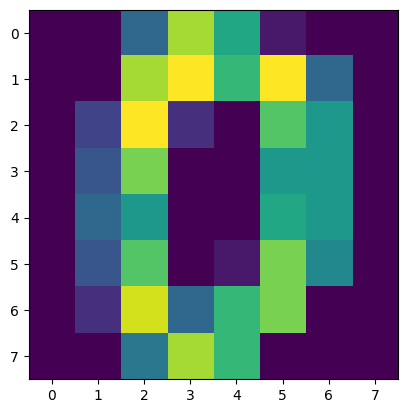

In [36]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [88]:
X = digits.data
y = digits.target
U, S, VT = svd(X, full_matrices=False)

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

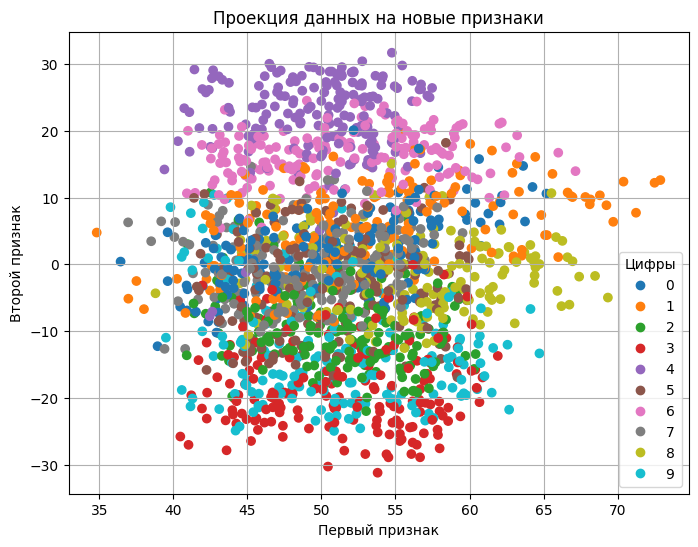

In [89]:
pr = U[:, :2] @ np.diag(S[:2])

plt.figure(figsize=(8,6))
scatter = plt.scatter(pr[:,0], pr[:,1], c=y, cmap='tab10')
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
plt.title('Проекция данных на новые признаки')
plt.legend(*scatter.legend_elements(), title="Цифры")
plt.grid(True)
plt.show()

**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

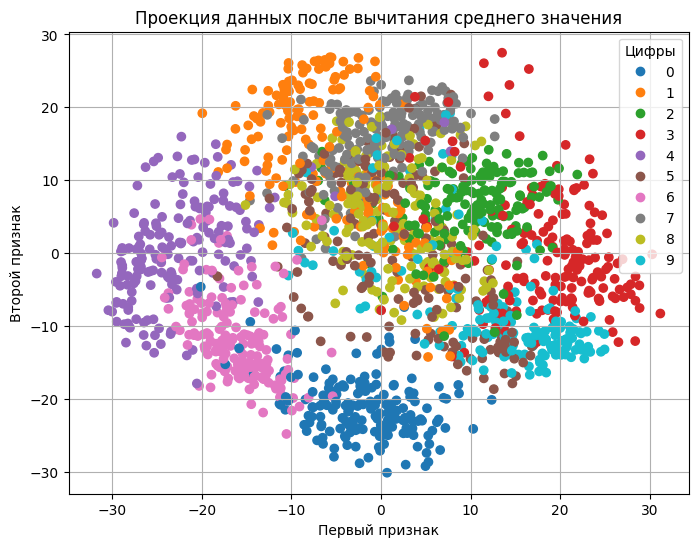

In [90]:
X_mean = np.mean(X, axis=0)
X_new = X - X_mean

U_new, S_new, VT_new = np.linalg.svd(X_new, full_matrices=False)

pr_new = U_new[:, :2] @ np.diag(S_new[:2])

plt.figure(figsize=(8,6))
scatter = plt.scatter(pr_new[:,0], pr_new[:,1], c=y, cmap='tab10')
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
plt.title('Проекция данных после вычитания среднего значения')
plt.legend(*scatter.legend_elements(), title="Цифры")
plt.grid(True)
plt.show()

**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

Последняя визуализация выгодно отличается тем, что она показывает структуру данных относительно их центра (средней точки), что делает компоненты более интерпретируемыми и помогает лучше понять внутренние связи внутри данных.

**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

In [91]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
СКИП

NameError: name 'СКИП' is not defined

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$:

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, мы сгененерируем много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построим аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`

In [92]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

/var/folders/1g/dbz0vmls7b3408g90fsggdqr0000gn/T/ipykernel_41727/503124060.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, hist=False, kde=True,
/var/folders/1g/dbz0vmls7b3408g90fsggdqr0000gn/T/ipykernel_41727/503124060.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

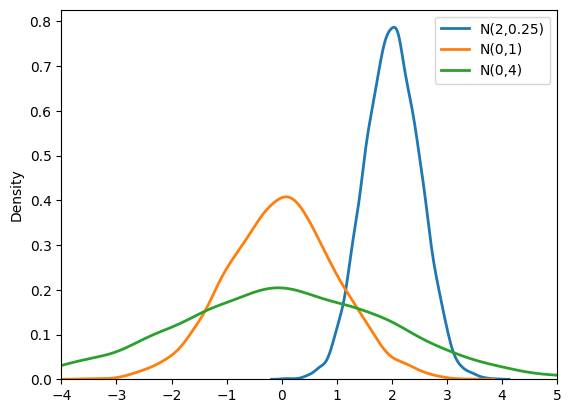

In [93]:
N = 10000
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**Несколько фактов**

* Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Поверхности уровня $p(x) = c$ — это эллипсоиды.

*  Пользуясь теоремой о приведении квадратичной формы к главным осям, можно показать, что функция плотности многомерного нормального распределения представляется в виде произведения одномерных нормальных плотностей при переходе в новую систему координат.
$$p(x)=\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}\:\underset{\text{новая система координат}}{\to}\: p(x)=p(x_1)\cdot ...\cdot p(x_n)$$

    В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы (то есть матрица ковариации $\Sigma$ диагональна).

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

<Axes: >

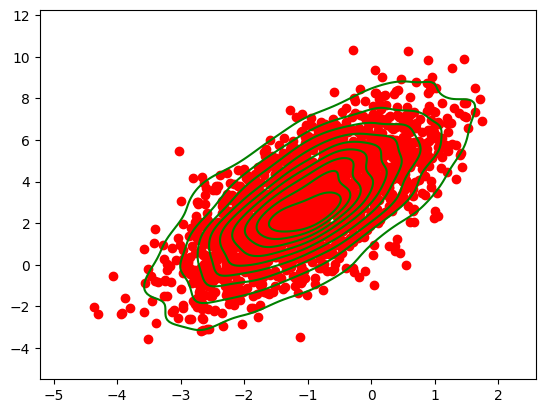

In [94]:
import seaborn as sns
import numpy as np

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(x=s[:, 0], y=s[:, 1], fill=False, color='g')

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**1. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

<Axes: >

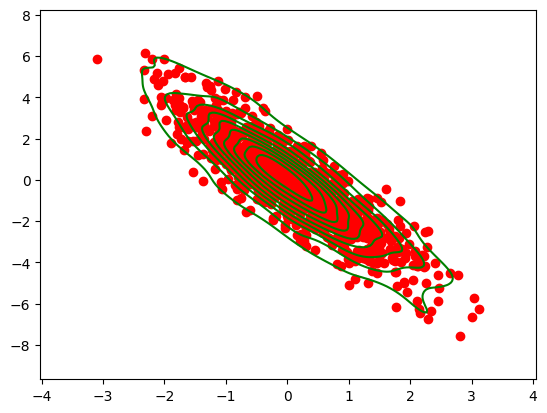

In [114]:
N = 1000
X = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.array([[1,-2],[-2,5]]), size=N)
plt.scatter(X[:,0], X[:,1], color='red')
sns.kdeplot(x=X[:, 0], y=X[:, 1], fill=False, color='g')

**2. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

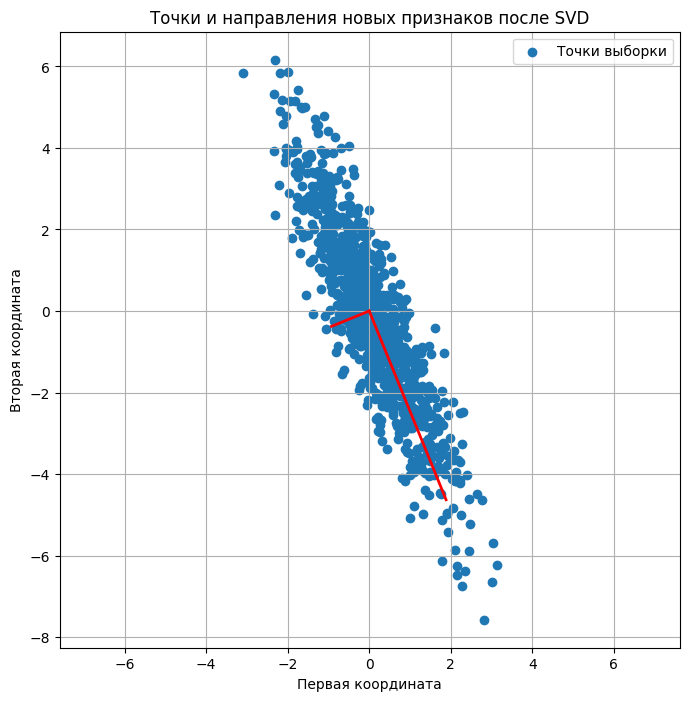

In [134]:
U, S, VT = np.linalg.svd(X, full_matrices=False)

plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], label='Точки выборки')


v0 = VT[0] * 5
plt.plot([0, v0[0]], [0, v0[1]], color='r', linewidth=2)

v1 = VT[1]
plt.plot([0, v1[0]], [0, v1[1]], color='r', linewidth=2)

plt.xlabel('Первая координата')
plt.ylabel('Вторая координата')
plt.title('Точки и направления новых признаков после SVD')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

**3. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

$\det\begin{pmatrix}
1-t & -2\\
-2 & 5-t
\end{pmatrix} = t^2-6t+1 \implies \lambda_1 = 3-2\sqrt{2},\ \lambda_2 = 3+2\sqrt{2}$\
$\lambda_1: \begin{pmatrix}
2\sqrt{2}-2 & -2\\
-2 & 2\sqrt{2}+2
\end{pmatrix} \to \begin{pmatrix}
1 & -\sqrt{2}-1\\
0 & 0
\end{pmatrix} \implies v_1 = \begin{pmatrix}
\sqrt{2}+1\\
1
\end{pmatrix}$\
$\lambda_2: \begin{pmatrix}
-2\sqrt{2}-2 & -2\\
-2 & -2\sqrt{2}+2
\end{pmatrix} \to \begin{pmatrix}
1 & \sqrt{2}-1\\
0 & 0
\end{pmatrix} \implies v_2 = \begin{pmatrix}
-\sqrt{2}+1\\
1
\end{pmatrix}$\
Направления собственных векторов совпадают с напавлениями полуосей эллипса.

Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

**4. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже.

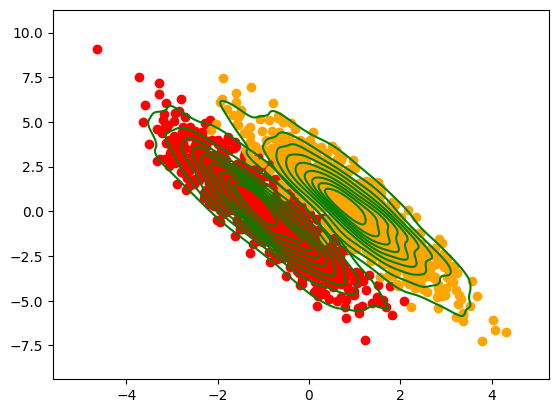

In [144]:
N = 1000
cov = np.array([[1,-2],[-2,5]])
a = np.random.multivariate_normal(mean=np.array([-1,0]), cov=cov, size=N)
plt.scatter(a[:,0], a[:,1], color='red')
sns.kdeplot(x=a[:, 0], y=a[:, 1], fill=False, color='g')

b = np.random.multivariate_normal(mean=np.array([1,0]), cov=cov, size=N)
plt.scatter(b[:,0], b[:,1], color='orange')
sns.kdeplot(x=b[:, 0], y=b[:, 1], fill=False, color='g')
res  = np.concatenate((a,b))

**5. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

<Axes: >

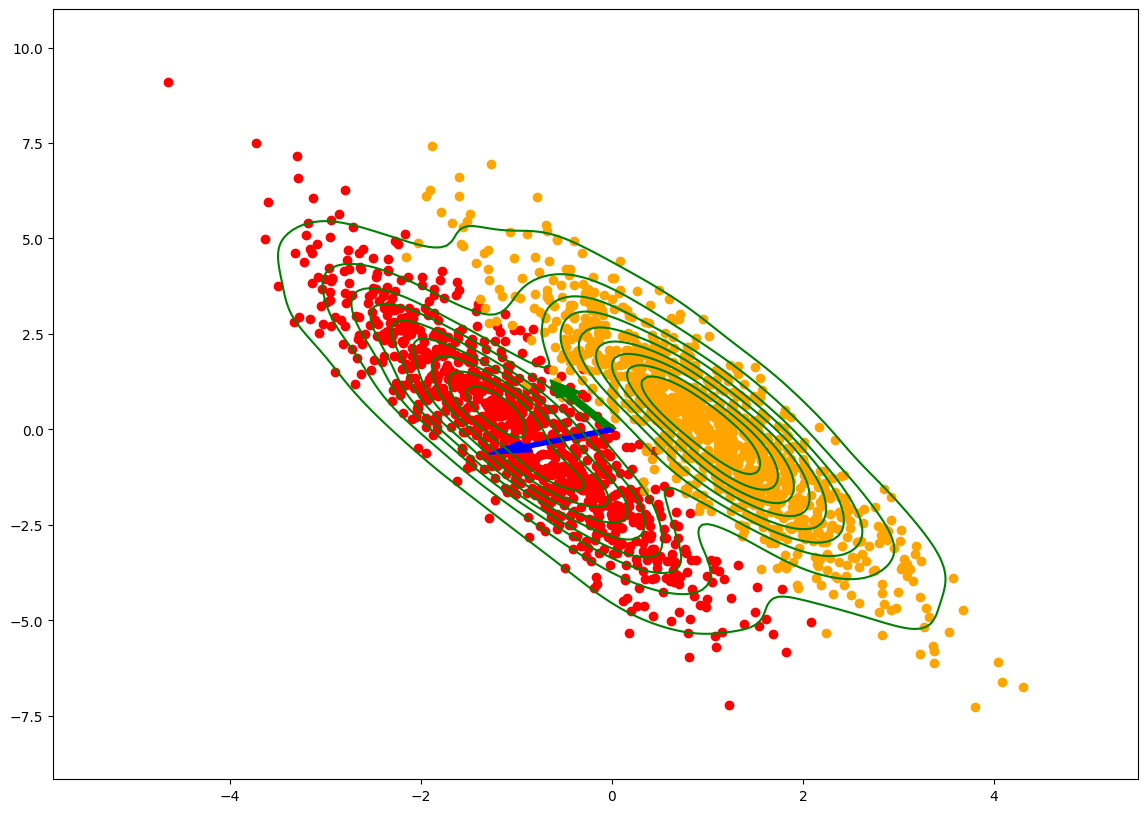

In [155]:
U, S, VT = svd(res, full_matrices=False)

plt.figure(figsize=(14, 10))

plt.scatter(a[:,0], a[:,1], color='red')
plt.scatter(b[:,0], b[:,1], color='orange')

plt.arrow(0, 0, VT[0, 0], VT[0, 1], color = 'g',  width = 0.1)
plt.arrow(0, 0, VT[1, 0], VT[1, 1], color = 'b',  width = 0.1)

sns.kdeplot(x=res[:, 0], y=res[:, 1], fill=False, color='g')

Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**6. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

Один из признаков (зеленый) позволяет довольно хорошо разделить два кластера.

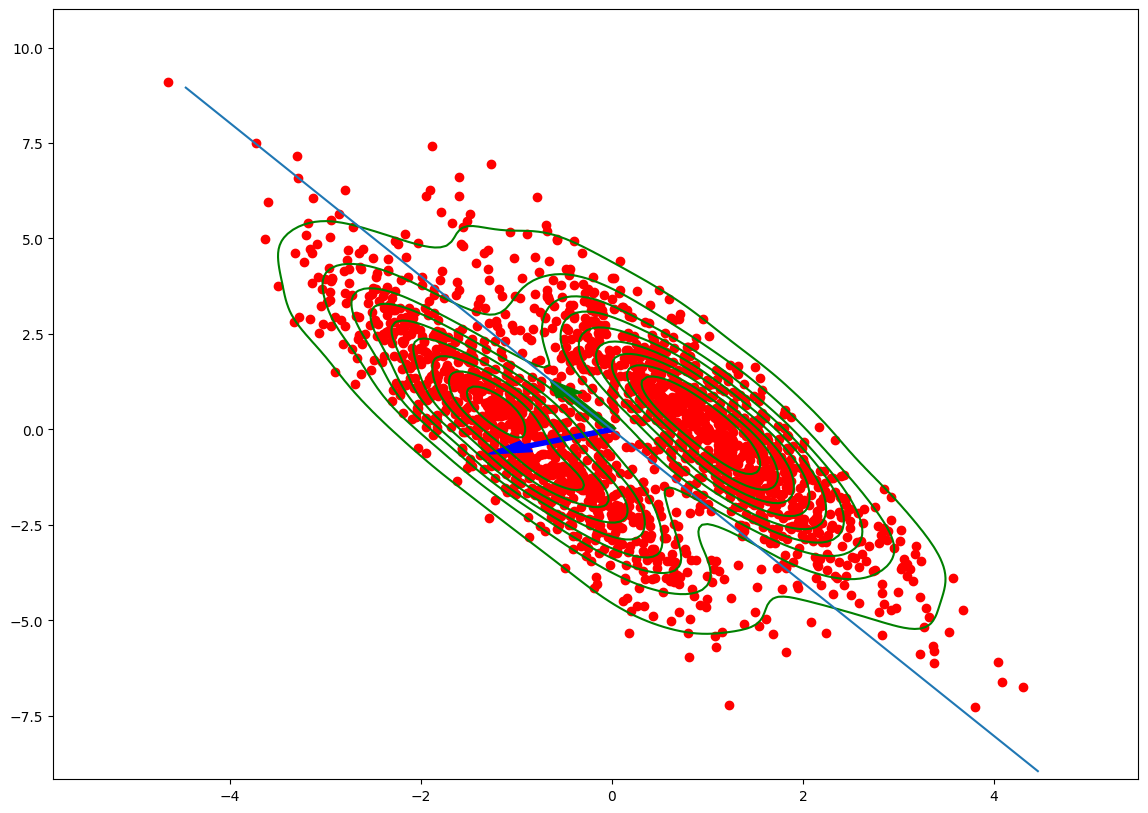

In [161]:
U, S, VT = svd(res, full_matrices=False)

plt.figure(figsize=(14, 10))

plt.scatter(a[:,0], a[:,1], color='red')
plt.scatter(b[:,0], b[:,1], color='red')

plt.arrow(0, 0, VT[0, 0], VT[0, 1], color = 'g',  width = 0.1)
plt.arrow(0, 0, VT[1, 0], VT[1, 1], color = 'b',  width = 0.1)

sns.kdeplot(x=res[:, 0], y=res[:, 1], fill=False, color='g')
plt.plot([VT[0, 0] * (-10) , VT[0, 0] * 10], [VT[0, 1] * (-10), VT[0, 1] * 10])

**7. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

<Axes: >

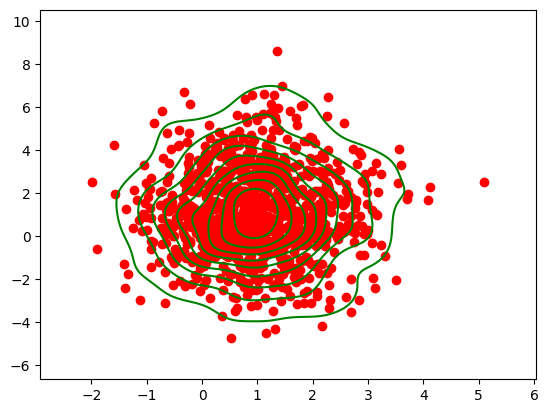

In [162]:
N = 1000
a = np.random.multivariate_normal(mean=np.array([1,1]), cov=np.array([[1,0],[0,4]]), size=N)
plt.scatter(a[:,0], a[:,1], color='red')
sns.kdeplot(x=a[:, 0], y=a[:, 1], fill=False, color='g')

**8. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

Матрциа диагональна, поэтому оси эллипса параллельны осям координат.

**9. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

<Axes: >

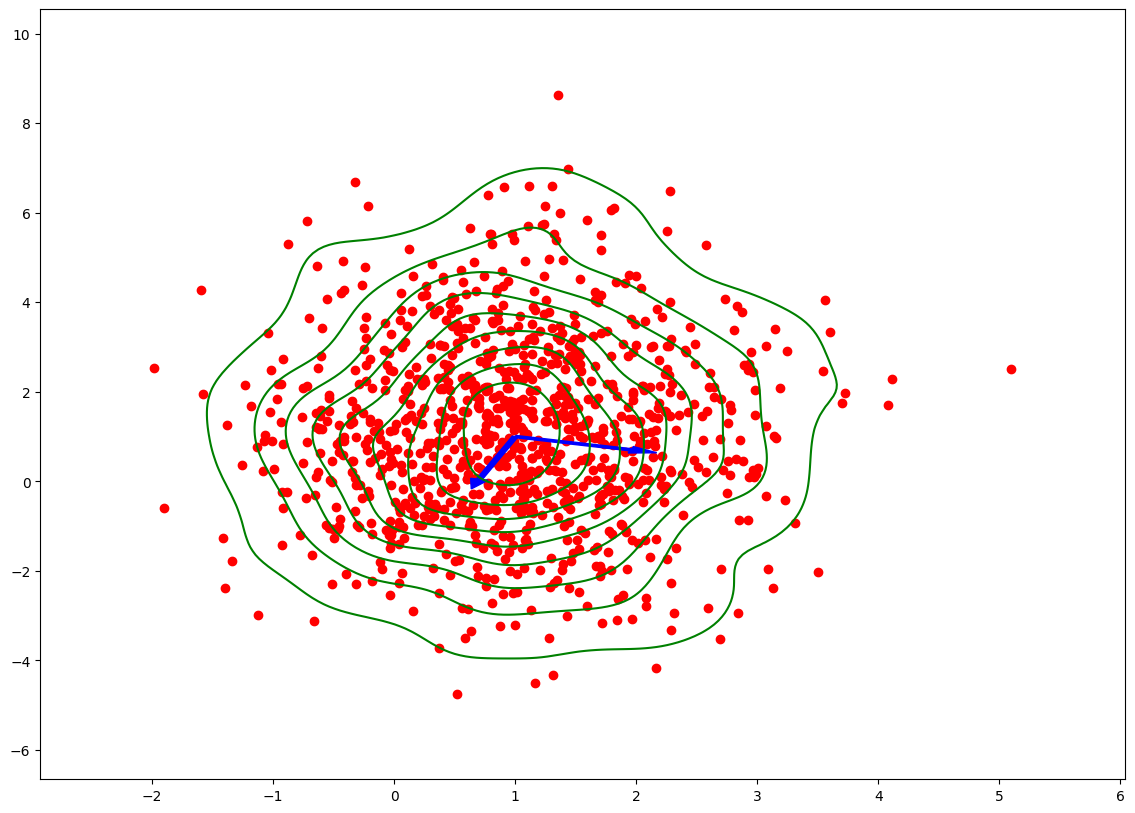

In [165]:
U, S, VT = svd(a, full_matrices=False)

plt.figure(figsize=(14, 10))

plt.scatter(a[:,0], a[:,1], color='red')

plt.arrow(1, 1, VT[0, 0], VT[0, 1],color = 'b',  width = 0.05)
plt.arrow(1, 1, VT[1, 0], VT[1, 1],color = 'b',  width = 0.05)

sns.kdeplot(x=a[:, 0], y=a[:, 1], fill=False, color='g')

**10. [0.4 балла]** Сделайте вывод: в чём проблема и как можно её исправить?

напрвления признаков не соответствуют одижаемым, так как данные не нормализованы.